 # Neural Network to Predict RawIntD

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Init Plugin
Init Graph Optimizer
Init Kernel


Import the data

In [43]:
# Load the data
data = pd.read_csv('../data/Yi.data.longformat.20191121_censoring_handled.csv', sep=',',header=0)

data.head()

,Date,GloveSizeGroup,GloveSize,RawIntD,LoadingWeight,ContactNumber,Surface,Gloves,Gender,ID,PowderArea
0,05/07/2019,Medium,M,5896309,47.329800,1,Plastic,Y,Male,1,29.513
1,05/07/2019,Medium,M,4510793,271.252321,1,Cloth,Y,Male,1,60.898
2,05/07/2019,Medium,M,2865536,161.794500,1,Glass,Y,Male,1,56.828
3,05/07/2019,Medium,NaN,9695240,104.174400,1,Plastic,N,Male,1,78.440
4,05/07/2019,Medium,NaN,10471291,149.071000,1,Cloth,N,Male,1,86.345


In [44]:
# Drop the columns that are not needed: Date, GloveSizeGroup,GloveSize,ID and Gender
data = data.drop(columns=["Date","GloveSizeGroup","GloveSize","ID","Gender"])
# Select the features and target
X = data.drop(columns=["RawIntD"])
y = data["RawIntD"]

Run One-Hot encoding for Surface and Gloves

In [45]:
# One-hot encode the data using pandas get_dummies
X = pd.get_dummies(X)
X.head()

,LoadingWeight,ContactNumber,PowderArea,Surface_Cloth,Surface_Glass,Surface_Plastic,Gloves_N,Gloves_Y
0,47.329800,1,29.513,0,0,1,0,1
1,271.252321,1,60.898,1,0,0,0,1
2,161.794500,1,56.828,0,1,0,0,1
3,104.174400,1,78.440,0,0,1,1,0
4,149.071000,1,86.345,1,0,0,1,0


In [66]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Normalise the y data

In [25]:
# Normalize the training set
mean = np.mean(y_train, axis=0)
std = np.std(y_train, axis=0)
y_train = (y_train - mean) / std

# Normalize the test set
y_test = (y_test - mean) / std


1943    8947876
495     3773646
1672    2862454
1359    7345221
Name: RawIntD, dtype: int64

In [71]:
# Define the model - deep neural net

model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=34, batch_size=1)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, batch_size=1)
print("Test MSE:", score)

Epoch 1/34


2023-01-04 09:28:40.393141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2016/2016 [==============================] - 9s 4ms/step - loss: 60485127920742.0469 - accuracy: 0.0000e+00
Epoch 2/34
2016/2016 [==============================] - 8s 4ms/step - loss: 57046952840336.6875 - accuracy: 0.0000e+00
Epoch 3/34
2016/2016 [==============================] - 8s 4ms/step - loss: 56711291761925.4609 - accuracy: 0.0000e+00
Epoch 4/34
2016/2016 [==============================] - 8s 4ms/step - loss: 56709453876969.7891 - accuracy: 0.0000e+00
Epoch 5/34
2016/2016 [==============================] - 8s 4ms/step - loss: 59458360706323.6719 - accuracy: 0.0000e+00
Epoch 6/34
2016/2016 [==============================] - 8s 4ms/step - loss: 56721979646776.4766 - accuracy: 0.0000e+00
Epoch 7/34
2016/2016 [==============================] - 8s 4ms/step - loss: 59063826426906.9062 - accuracy: 0.0000e+00
Epoch 8/34
2016/2016 [==============================] - 8s 4ms/step - loss: 57100657320151.2578 - accuracy: 0.0000e+00
Epoch 9/34
2016/2016 [==============================] - 9s 

2023-01-04 09:33:20.436121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


504/504 [==============================] - 2s 3ms/step - loss: 57511449198592.0000 - accuracy: 0.0000e+00
Test MSE: [57511449198592.0, 0.0]


In [68]:
# Save the model
model.save("model.h5")

2023-01-04 09:27:39.212683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


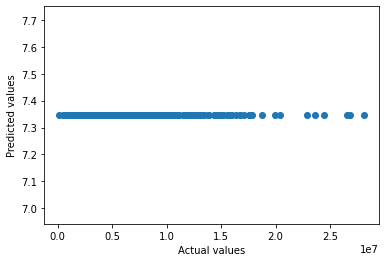

In [69]:
# Use the model to predict the test data
y_pred = model.predict(X_test)

# Plot the predicted and actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()



## Plot the loss per epoch

Text(0, 0.5, 'Accuracy')

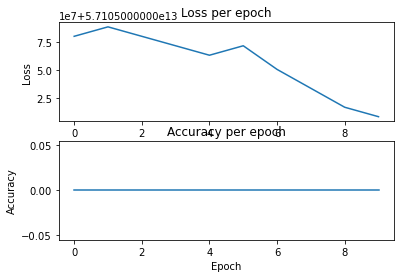

In [70]:
import matplotlib.pyplot as plt

# Get the loss values from the history object
loss = history.history['loss']

# Get the accuracy values from the history object
acc = history.history['accuracy']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot the loss values on the first subplot
ax1.plot(loss)
ax1.set_title('Loss per epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Plot the accuracy values on the second subplot
ax2.plot(acc)
ax2.set_title('Accuracy per epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

In [64]:
history.history['accuracy']

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]